In [1]:
import json
import pandas as pd
import os
import datetime
#from pandas import Grouper
import re
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import glob
#import nltk
#from nltk.corpus import stopwords

In [2]:
#Change path for each post
path = r'E:\Instagram\Typhoon_danas\json\post_info'
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('UTC.json')]
os.chdir(path)


## See if JSON file is valid

In [3]:
for jf in tqdm(json_files):
    with open(jf,'r') as data:
        try:
            json.load(data)
        except:
            print('Invalid json: ',jf)

100%|█████████████████████████████████████████████████████████████████████████████| 4453/4453 [00:25<00:00, 173.73it/s]


In [6]:
post_created_time = [] #The time when the post was created
is_ad = []# Is this post an ad?
post_owner = [] # Post owner user name
post_owner_id = []#post owner id number
is_video = [] # Is this post a video?
like_count =[] # like count of a post
caption = [] # Caption of the post
caption_hashtag = [] # Hash tags in each captions
caption_mention = [] #check if there is any mention
post_count = [] # set 1 for each account
num_comment = [] # Number of comments for each post


In [7]:
for cmts in tqdm(json_files):
    post_created_time.append(datetime.datetime.strptime(cmts[:-9],'%Y-%m-%d_%H-%M-%S'))
    with open(cmts,'r',encoding="utf-8") as f:
        data = json.load(f)
        try:
            is_ad.append(data['node']['is_ad'])
        except:
            is_ad.append('-')
        try:
            post_owner.append(data['node']['owner']['username'])
        except:
            pass
        post_owner_id.append(data['node']['owner']['id'])
        is_video.append(data['node']['is_video'])
        like_count.append(data['node']['edge_liked_by']['count'])
        try:
            caption.append(data['node']['edge_media_to_caption']['edges'][0]['node']['text'].replace('\n','\\n'))
        except:
            caption.append('-')
        post_count.append(1)
        num_comment.append(data['node']['edge_media_to_comment']['count'])

100%|████████████████████████████████████████████████████████████████████████████| 4453/4453 [00:03<00:00, 1173.66it/s]


In [8]:
caption_hashtag = [re.findall(r"#[A-Za-z0-9_.\u3131-\u3163\uac00-\ud7a3]+", c) for c in caption]

In [9]:
caption_mention = [re.findall(r"@[A-Za-z0-9_.\u3131-\u3163\uac00-\ud7a3]+", c) for c in caption]

In [10]:
post_info = pd.DataFrame({    'Post_created_time':pd.Series(post_created_time),
                              'is_ad':pd.Series(is_ad),
                              'Post_Owner':pd.Series(post_owner),
                              'Post_Owner_id':pd.Series(post_owner_id),
                              'is_video':pd.Series(is_video),
                              'like_count':pd.Series(like_count),
                              'caption':pd.Series(caption),
                              'CaptionHashtag':pd.Series(caption_hashtag),
                              'CaptionMention':pd.Series(caption_mention),
                              'PostCount':pd.Series(post_count),
                              'NumComment':pd.Series(num_comment)
                                })

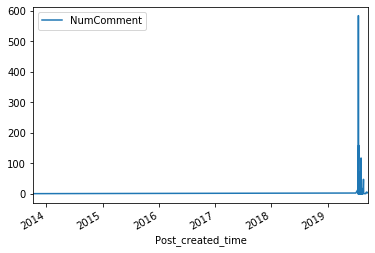

In [11]:
post_info =  post_info.sort_values('Post_created_time',ascending= True)
post_info.plot(x='Post_created_time',y = 'NumComment')

In [12]:
post_info

,Post_created_time,is_ad,Post_Owner,Post_Owner_id,is_video,like_count,caption,CaptionHashtag,CaptionMention,PostCount,NumComment
4452,2013-10-07 13:29:47,False,eunzinkim,17467806,False,26,신난다! #태풍다나스 무서워 비행기 뜨겠지..#cafedeseoyeun #제주도 #...,"[#태풍다나스, #cafedeseoyeun, #제주도, #민아지윤찬양]",[],1,0
4451,2013-10-08 07:39:06,False,joonhyuksong,271612925,False,14,가을비 #Diamond Ogilvy #태풍다나스 #vscocam,"[#Diamond, #태풍다나스, #vscocam]",[],1,0
214,2019-07-02 10:25:26,False,yeomguyioung,15375126768,False,11,비온뒤 하늘 참 맑다\n#여름하늘\n#벌교날씨\n#태풍다나스,"[#여름하늘, #벌교날씨, #태풍다나스]",[],1,2
3624,2019-07-15 06:40:54,False,joatte_official,2967530031,True,62,안녕하세요.조아뜨입니다.\n지금 서울에는 비가 ☔️무지하게 내리고 있어요.\n쏟아진...,"[#빗소리, #빗물, #장마, #태풍, #여름장마, #여름휴가, #가을비, #봄비,...",[],1,13
4450,2019-07-16 13:26:23,False,yoommooy__,1562927982,False,24,#여름 \n맛있어서 기절할 맛.,[#여름],[],1,2
...,...,...,...,...,...,...,...,...,...,...,...
4,2019-09-08 15:55:01,False,smart_flower_sy,3645121853,False,43,돌스냅 원본 미리보기😁 한달만에 원본 몇장 맛보기로 받았는데 마음이 간질간질해 더 ...,"[#무보정, #강승한스냅, #태풍다나스, #너를잊지못한다, #참많이습했어요, #참정...",[],1,5
3,2019-09-09 10:11:53,False,hr_park52,5726195901,False,27,20190720\n짠👋\n#보령#우유창고#에너자이져\n#파베초콜릿#밀크티#카페라떼\...,"[#보령, #우유창고, #에너자이져, #파베초콜릿, #밀크티, #카페라떼, #신기해...",[],1,4
2,2019-09-18 15:04:45,False,funky6783,3166603031,False,27,본격! 내 돈주고 난민체험!\n\n여름 휴가를 태풍으로 시작해서 돌아오니 태풍도 같...,"[#klook, #망한여행사진대회, #망여사, #클룩이랑다시갈래, #클룩, #날씨빌...",[],1,4
1,2019-09-18 15:11:41,False,funky6783,3166603031,False,24,10여년전에 혼자왔던 보라카이\n\n올해는 가족과 함께왔건만\n\n시원한 바람만 실...,"[#klook, #망한여행사진대회, #망여사, #클룩이랑다시갈래, #클룩, #날씨빌...",[],1,3


In [13]:
post_info = post_info[post_info['Post_created_time'] > '2019-07-01' ]

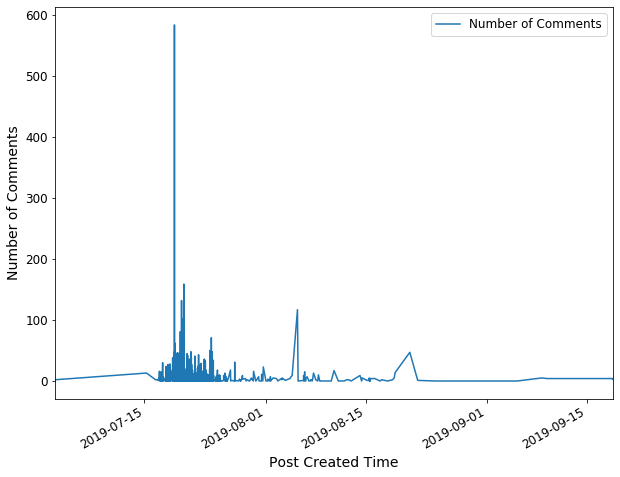

In [14]:
post_info =  post_info.sort_values('Post_created_time',ascending= True)
post_info.plot(x='Post_created_time',y = 'NumComment').tick_params(labelsize=12)
plt.ylabel('Number of Comments',fontsize=14)
plt.xlabel('Post Created Time',fontsize=14)
plt.legend(['Number of Comments'],prop={'size': 12})
fig= plt.gcf()
fig.set_size_inches(10, 8)


## Hash Tag / Count

In [27]:
def hashT_count(hashT_list):
    cnt = Counter()
    a = [val for sublist in hashT_list for val in sublist]#Flattening the list
    for word in a:
        cnt[word] += 1
    df_wc = pd.DataFrame.from_dict(cnt,orient='index').reset_index().sort_values(by=0,ascending=False)
    return df_wc

In [32]:
hc = hashT_count(post_info['CaptionHashtag'])
#hc = hc.rename(columns={0:'freq'})
#hc.to_csv('flood_ko_Post_Caption_Hashtag.csv',header=True,encoding='utf-8',index=False)
hc.head()

,index,0
18,#bodypositivitymovement,10810
42,#bodypositivity,4883
99,#bodypositive,3988
76,#selflove,2561
68,#loveyourself,2148


## Mention Count

In [35]:
mc = hashT_count(post_info['CaptionMention'])
mc.head()

,index,0
1910,@torrid,103
239,@new_o2gym,101
63,@torridfashion,94
59,@middayindia,90
18,@prettyasapicturephotography,73


## Caption Word Count

In [36]:
def word_count(hashT_list):
    cnt = Counter()
    a = [i.split() for i in hashT_list]#Tokenize Words
    b = [item for sublist in a for item in sublist]
    for word in b:
        cnt[word] += 1
    df_wc = pd.DataFrame.from_dict(cnt,orient='index').reset_index().sort_values(by=0,ascending=False)
    return df_wc

In [37]:
wc = word_count(post_info['caption'])
wc.head()

,index,0
13,to,37701
55,and,33549
45,I,31128
36,the,30517
21,a,23421


In [40]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')
s_word= set(stopwords.words('english'))
punct_l = set(punctuation)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [55]:
def w_count2(x):
    cnt = Counter()
    a = [i.lower().split() for i in x]#Tokenize Words
    b = [item for sublist in a for item in sublist]
    for word in b:
        if word not in s_word: # Removes stop words
            if word not in punct_l: # Removees Punctuation
                if '#' not in word: # Removes hashtag
                    if '@' not in word: # Removes mentioned account
                        cnt[word] += 1
        else:
            pass
    return dict(sorted(cnt.items(), key=lambda pair: pair[1], reverse=True))

In [63]:
cap_cnt = w_count2(post_info['caption'])

In [69]:
cap_cnt2 = pd.DataFrame.from_dict(cap_cnt,orient='index').reset_index().rename(columns={'index':'word',0:'freq'})
cap_cnt2.head()

,word,freq
0,body,5678
1,love,4200
2,like,3771
3,i’m,3569
4,it’s,3341


In [71]:
analyser = SentimentIntensityAnalyzer()

wd_analysis = cap_cnt2.word.to_list()
wd = []

for word in tqdm(wd_analysis):
    score = analyser.polarity_scores(word)
    wd.append(score)
    
sent_a3 = pd.DataFrame(wd)
sent_a3['Word'] = cap_cnt2.word


100%|███████████████████████████████████████████████████████████████████████| 109878/109878 [00:05<00:00, 18472.86it/s]